<h1 align='center'> Web Scraping in Python with BeautifulSoup </h1>

<h3> Why scrape data off a webpage ? </h3>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
sns.set()

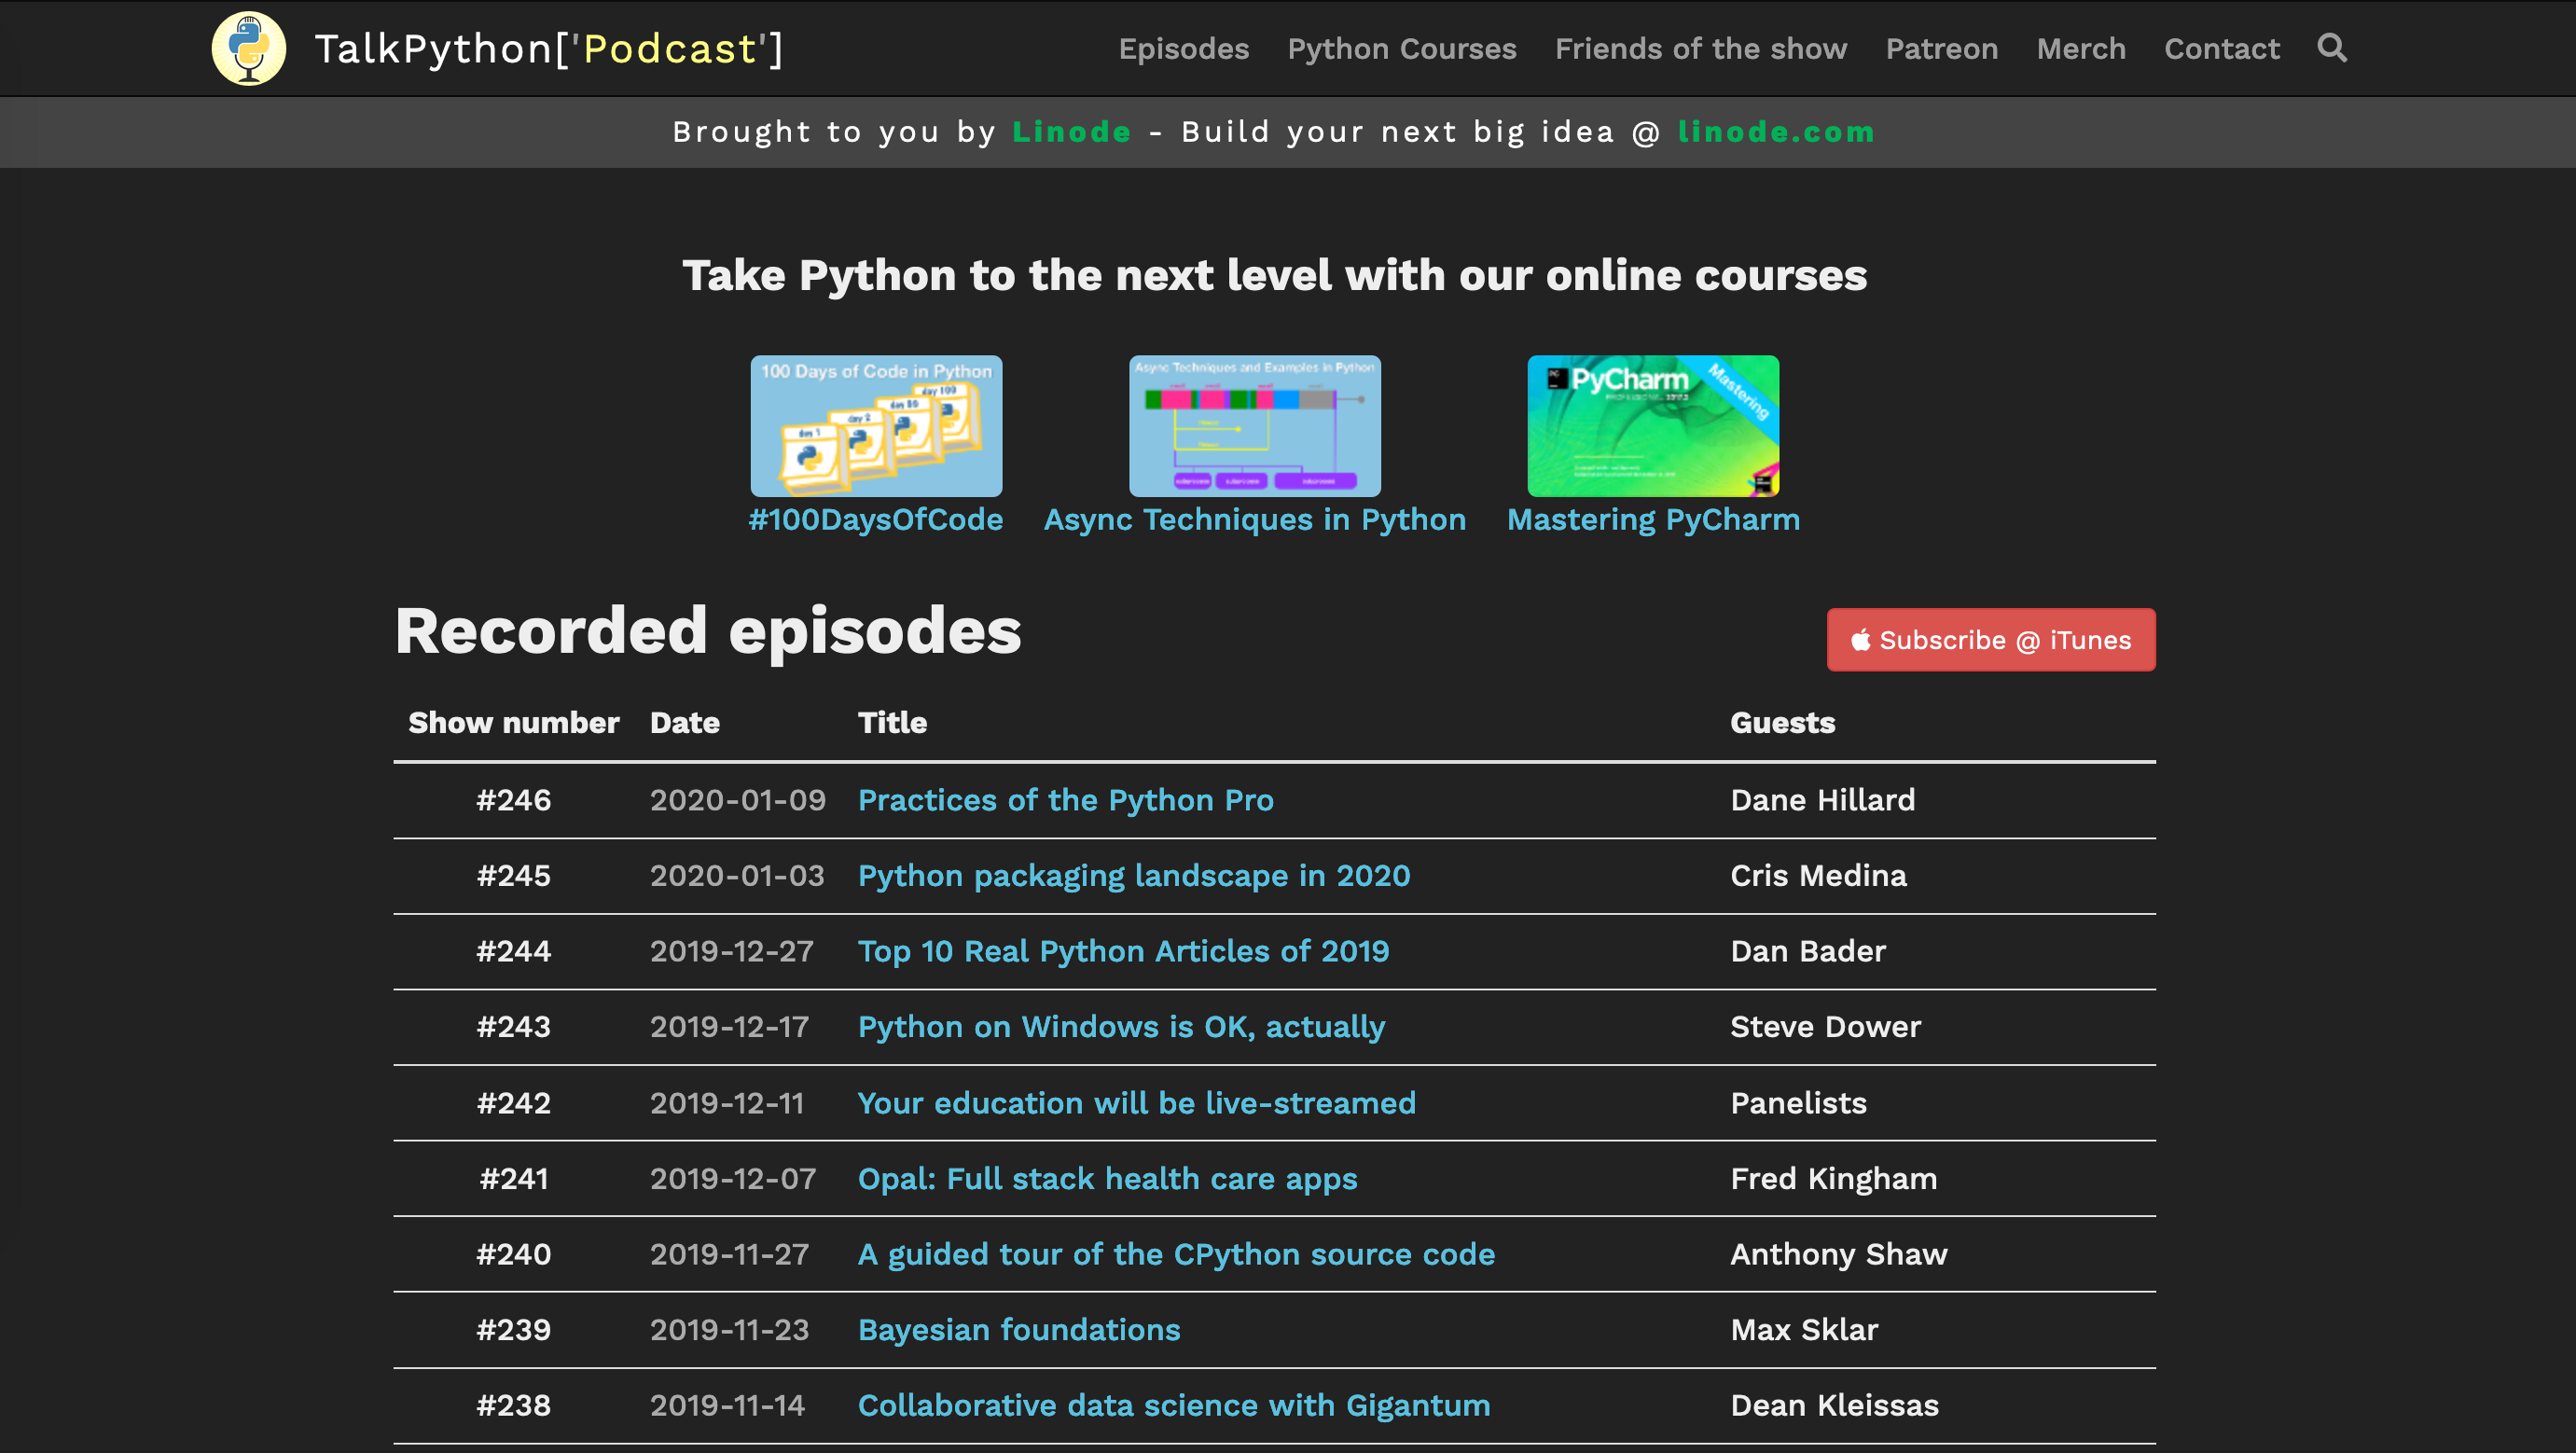

In [2]:
URL = 'https://talkpython.fm/episodes/all'
def request_page(url=URL):
    """sends a request to the url and stores the response as beautiful soup object
    
    args:
        url: The URL of the web page
    returns:
        beautifulsoup object of the web page
    """
    
    response = requests.get(url)
    response.raise_for_status()
    page = response.text
    soup = BeautifulSoup(page, 'html.parser')
    return soup

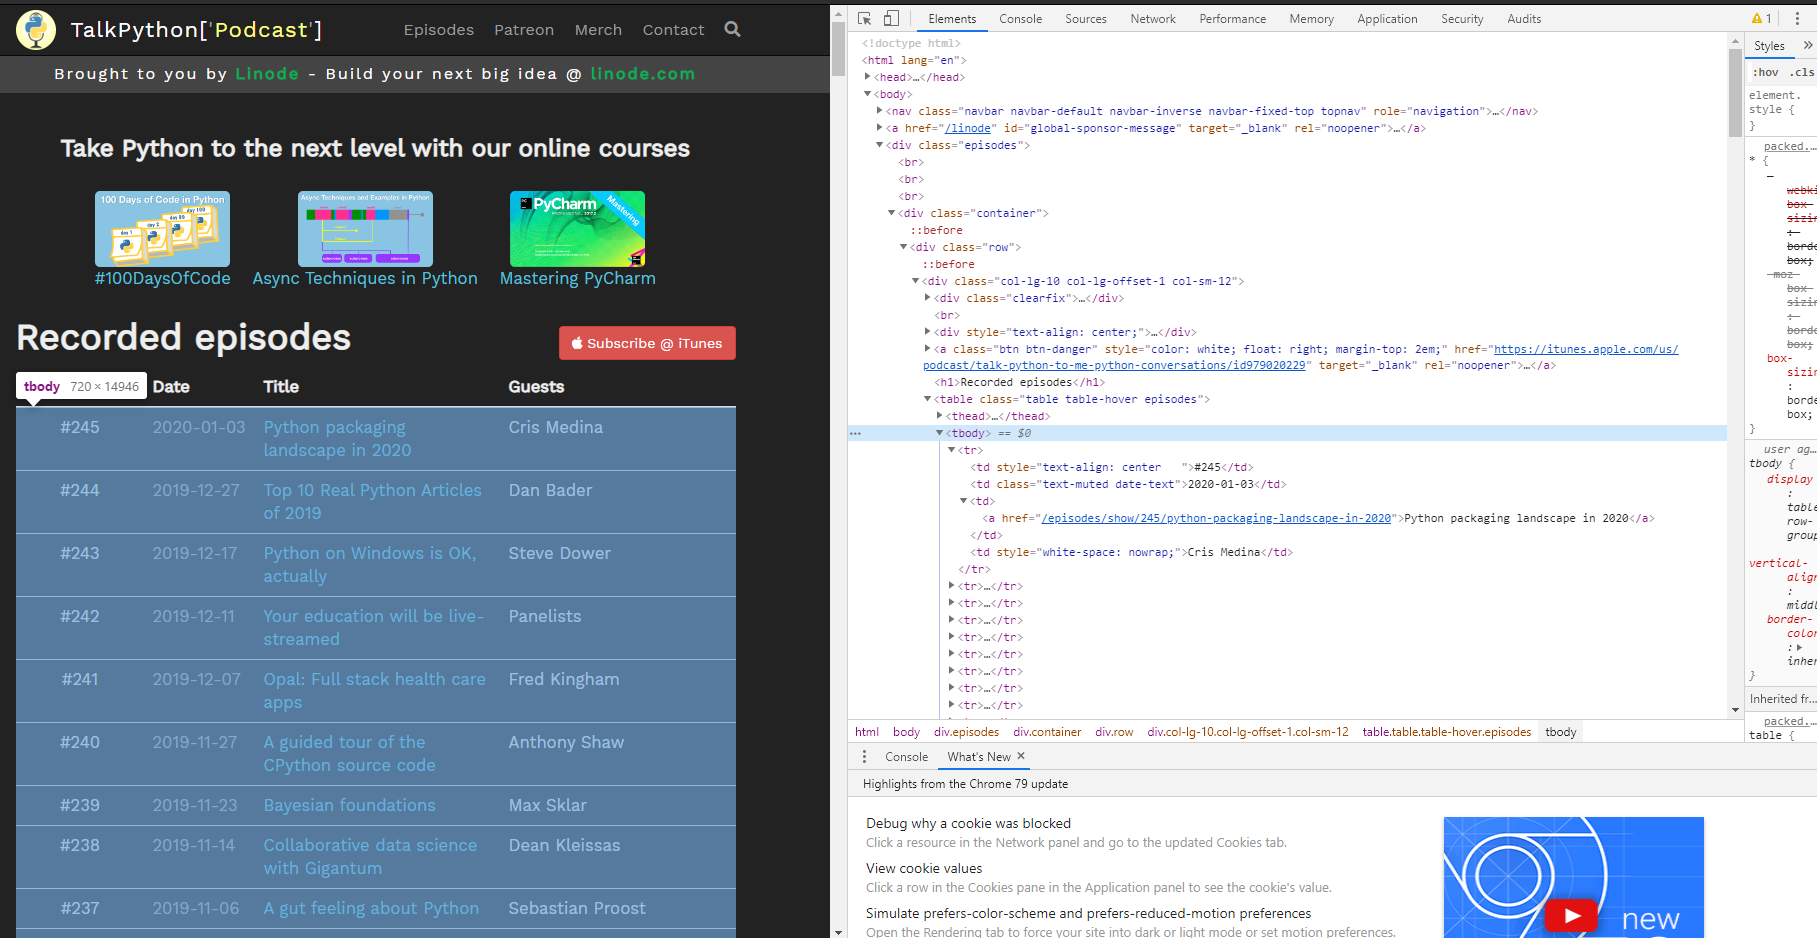

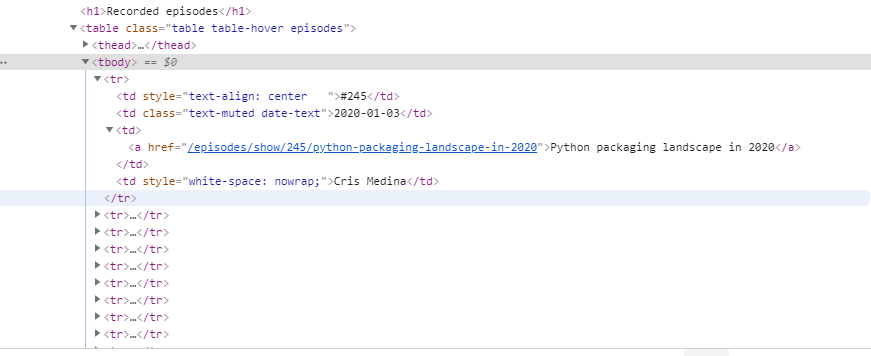

In [3]:
raw_page = request_page()

In [4]:
from pprint import pprint
pprint(raw_page)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Talk Python To Me is a podcast for developers who are passionate about Python. Learn about the language and related technologies." name="description"/>
<meta content="Michael Kennedy (@mkennedy)" name="author"/>
<link href="/static/img/favicon.png?cache_id=9d4e32c70e1800a7d4b6f18084ae3aa8" rel="shortcut icon"/>
<link href="/static/img/apple-touch/apple-touch-icon-180.png?cache_id=f05f1d4aa0b0494b126bf11439b86ef5" rel="apple-touch-icon"/>
<title>Episodes - [Talk Python To Me Podcast]</title>
<link href="https://talkpython.fm/episodes/rss" rel="alternate" title="Talk Python To Me Episodes" type="application/rss+xml"/>
<link href="https://fonts.googleapis.com/css?family=Work+Sans" rel="stylesheet"/>
<!-- HTML5 Shim and Respond.js IE8 support of HTML5 elements and media queries -->
<!--

<h2 align='center'> Traversing the html tree </h2>

Nested structure: tbody contains tr elements which contain td elements for each individual data point

In [5]:
raw_page.find('body')

<body>
<nav class="navbar navbar-default navbar-inverse navbar-fixed-top topnav" role="navigation">
<div class="container topnav">
<div class="navbar-header">
<button class="navbar-toggle" data-target="#bs-example-navbar-collapse-1" data-toggle="collapse" type="button">
<span class="sr-only">Toggle navigation</span>
<span class="icon-bar"></span>
<span class="icon-bar"></span>
<span class="icon-bar"></span>
</button>
<a class="navbar-brand topnav image" href="/">
<img alt="Talk Python To Me" class="logo-image hidden-xs img img-circle" src="/static/img/talk_python_logo_mic.png?cache_id=4e8e76b2438a57933fe769bd1fc5f6ef" title="Talk Python To Me"/>
</a>
<a class="navbar-brand topnav name" href="/">
<span class="logo-var">TalkPython</span><span class="logo-operator">[</span>'<span class="logo-key">Podcast</span>'<span class="logo-operator">]</span></a>
</div>
<div class="collapse navbar-collapse" id="bs-example-navbar-collapse-1">
<ul class="nav navbar-nav navbar-right">
<li>
<a href="/epi

In [6]:
# find will return the first matching element
headers = raw_page.find('body').find('tr')
headers

<tr>
<th style="width: 120px; white-space: nowrap;">Show number</th>
<th>Date</th>
<th>Title</th>
<th>Guests</th>
</tr>

In [7]:
# Can use this header as the title row of a tabular structure to hold the data
headers = raw_page.find('body').find('tr').text
columns = headers.split('\n')[1:-1]
columns

['Show number', 'Date', 'Title', 'Guests']

In [8]:
# find_all returns a list of all matching elements
raw_page.find('body').find_all('tr')

[<tr>
 <th style="width: 120px; white-space: nowrap;">Show number</th>
 <th>Date</th>
 <th>Title</th>
 <th>Guests</th>
 </tr>, <tr>
 <td style="text-align: center   ">#246</td>
 <td class="text-muted date-text">2020-01-09</td>
 <td><a href="/episodes/show/246/practices-of-the-python-pro">Practices of the Python Pro</a></td>
 <td style="white-space: nowrap;">Dane Hillard</td>
 </tr>, <tr>
 <td style="text-align: center   ">#245</td>
 <td class="text-muted date-text">2020-01-03</td>
 <td><a href="/episodes/show/245/python-packaging-landscape-in-2020">Python packaging landscape in 2020</a></td>
 <td style="white-space: nowrap;">Cris Medina</td>
 </tr>, <tr>
 <td style="text-align: center   ">#244</td>
 <td class="text-muted date-text">2019-12-27</td>
 <td><a href="/episodes/show/244/top-10-real-python-articles-of-2019">Top 10 Real Python Articles of 2019</a></td>
 <td style="white-space: nowrap;">Dan Bader</td>
 </tr>, <tr>
 <td style="text-align: center   ">#243</td>
 <td class="text-mut

In [9]:
# We can go one more layer deep to find the actual data
raw_page.find('body').find_all('tr')[1].find_all('td')

[<td style="text-align: center   ">#246</td>,
 <td class="text-muted date-text">2020-01-09</td>,
 <td><a href="/episodes/show/246/practices-of-the-python-pro">Practices of the Python Pro</a></td>,
 <td style="white-space: nowrap;">Dane Hillard</td>]

In [10]:
def scrape_table(soup):
    """scraps the table of talkpython podcast episodes
    
    args:
        soup: beatifulsoup object of the page html of the talkpython podcats
        
    returns:
        list of lists of the data elements
    """
    data = []
    table = soup.find('table', attrs={'class': "table table-hover episodes"})
    table_body = table.find('tbody')

    rows = table_body.find_all('tr')
    for row in rows:
        datum = row.find_all('td')
        datum = [ele.text.strip() for ele in datum]
        data.append([ele for ele in datum if ele])
        
    return data

In [11]:
data = scrape_table(raw_page)

In [12]:
pd.DataFrame(data, columns=columns)

,Show number,Date,Title,Guests
0,#246,2020-01-09,Practices of the Python Pro,Dane Hillard
1,#245,2020-01-03,Python packaging landscape in 2020,Cris Medina
2,#244,2019-12-27,Top 10 Real Python Articles of 2019,Dan Bader
3,#243,2019-12-17,"Python on Windows is OK, actually",Steve Dower
4,#242,2019-12-11,Your education will be live-streamed,Panelists
...,...,...,...,...
242,#4,2015-04-23,Enterprise Python and Large-Scale Projects,Mahmoud Hashemi
243,#3,2015-04-16,Pyramid Web Framework,Chris McDonough
244,#2,2015-04-07,Python and MongoDB,A. Jesse Davis
245,#1,2015-03-31,EVE - RESTful APIs for humans,Nicola Iarocci


<h4> Sometimes, there might be an easier way to get this done though </h4>

In [13]:
# Pandas read html makes this easy!

df = pd.read_html("https://talkpython.fm/episodes/all", 
                  attrs={'class': "table table-hover episodes"})

episodes = df[0] # it scrapes every table-like structure
episodes.head()

,Show number,Date,Title,Guests
0,#246,2020-01-09,Practices of the Python Pro,Dane Hillard
1,#245,2020-01-03,Python packaging landscape in 2020,Cris Medina
2,#244,2019-12-27,Top 10 Real Python Articles of 2019,Dan Bader
3,#243,2019-12-17,"Python on Windows is OK, actually",Steve Dower
4,#242,2019-12-11,Your education will be live-streamed,Panelists


<h2 align='center'> Caveats with scraping html with pandas </h2>

<h3> Notes from the pandas documentation <h3>

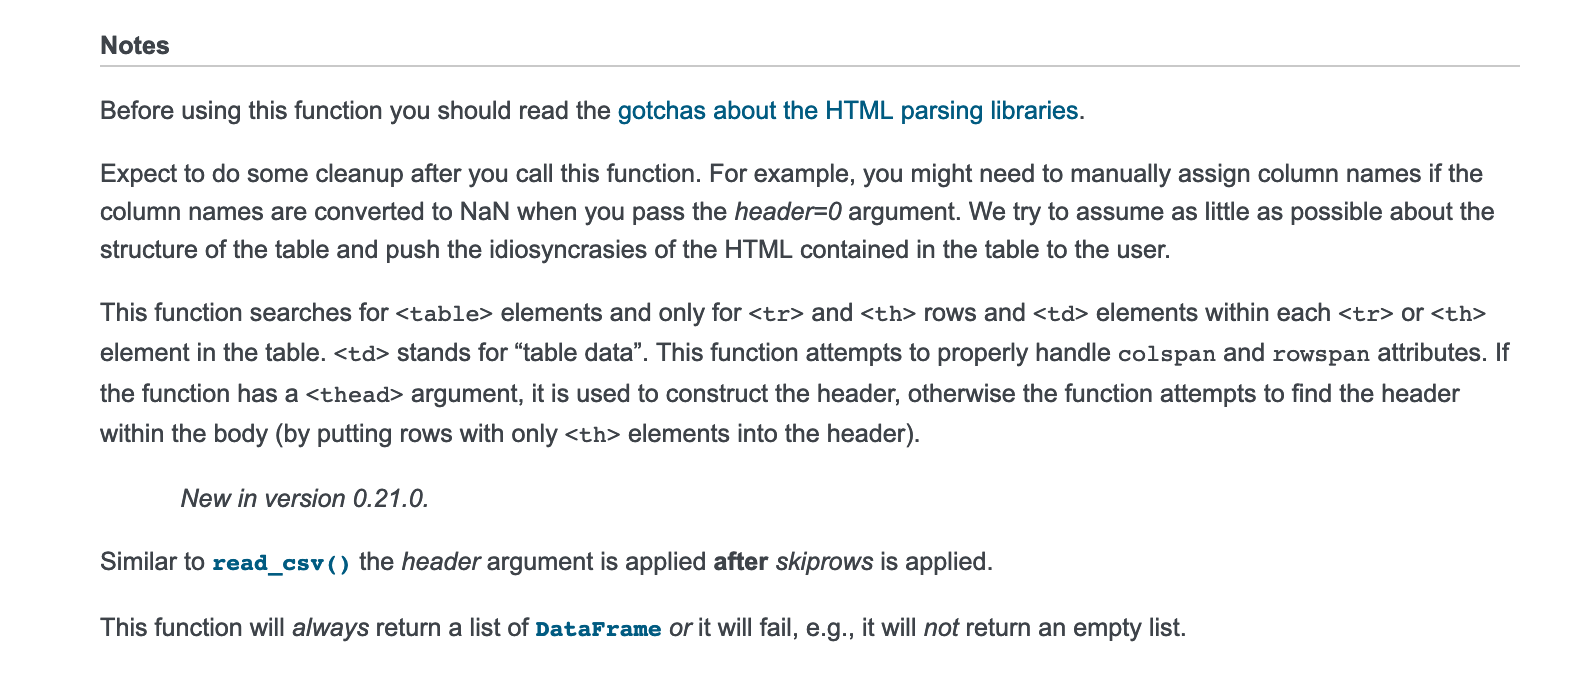

<h3 align='center'> So we have scrapped the data, now what? </h3>

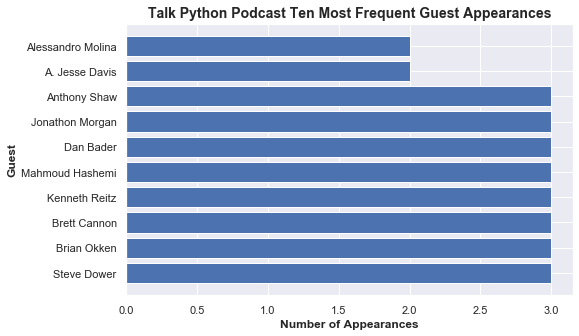

In [14]:
# which guests have appeared most frequently

most_frequent_guests = episodes['Guests'].value_counts()[1:11] # index 0 is panelists; not useful

fig, ax = plt.subplots(figsize=(8, 5))
plt.barh(most_frequent_guests.index, most_frequent_guests.values.astype('int32'), )
plt.ylabel('Guest', fontsize=12, fontweight='semibold')
plt.xlabel('Number of Appearances', fontsize=12, fontweight='semibold');
plt.title("Talk Python Podcast Ten Most Frequent Guest Appearances", fontsize=14, fontweight='bold');

In [15]:
# Other episodes featuring Brian Okken
episodes.query("Guests == 'Brian Okken'")

,Show number,Date,Title,Guests
65,#181,2018-10-12,30 amazing Python projects,Brian Okken
101,#145,2017-12-31,2017 Python Year in Review,Brian Okken
201,#45,2016-02-09,"The Python Testing Column, Now a Thing",Brian Okken


In [16]:
# What about episodes about OOP?
episodes[episodes['Title'].str.lower().str.contains('object|oriented|oop', regex=True)]

,Show number,Date,Title,Guests


In [17]:
# What's there about flask?
episodes[episodes['Title'].str.lower().str.contains('flask')]

,Show number,Date,Title,Guests
20,#226,2019-08-23,Building Flask APIs for data scientists,AJ Pryor
69,#177,2018-09-15,Flask goes 1.0,David Lord
99,#147,2018-01-19,"Quart: Flask, but 3x faster",Philip Jones
100,#146,2018-01-11,Building Alexa Skills with Python and Flask,Panelists
149,#97,2017-02-02,"Flask, Django style with Flask-Diamond",Ian Dennis Miller
198,#48,2016-03-01,Building Flask-based Web Apps,Miguel Grinberg
233,#13,2015-06-23,"Flask web framework and much, much more",Armin Ronacher


Episodes 226, `Building Flask APIs for data scientists`...Now, that's something I think would be super interesting!

In [18]:
# Other Python web frameworks?
episodes[episodes['Title'].str.lower().str.contains('flask|django|pyramid', regex=True)]

,Show number,Date,Title,Guests
20,#226,2019-08-23,Building Flask APIs for data scientists,AJ Pryor
40,#206,2019-04-06,Running Django in Production,Michael Herman
56,#190,2018-12-11,Teaching Django,William Vincent
69,#177,2018-09-15,Flask goes 1.0,David Lord
85,#161,2018-05-12,Django 2.0,Daniel Roy Greenfeld
99,#147,2018-01-19,"Quart: Flask, but 3x faster",Philip Jones
100,#146,2018-01-11,Building Alexa Skills with Python and Flask,Panelists
121,#125,2017-08-15,Django REST framework and a new API star is born,Tom Christie
148,#98,2017-02-08,Adding concurrency to Django with Django Channels,Andrew Godwin
149,#97,2017-02-02,"Flask, Django style with Flask-Diamond",Ian Dennis Miller


In [19]:
episodes['Date'] = pd.to_datetime(episodes['Date'])
episodes['Year'] = episodes['Date'].dt.year
episodes['Month'] = episodes['Date'].dt.strftime('%B')
episodes['Quarter'] = episodes['Date'].dt.quarter

In [20]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
ordered_month = pd.api.types.CategoricalDtype(ordered = True, categories = month_order)
episodes['Month'] = episodes['Month'].astype(ordered_month)

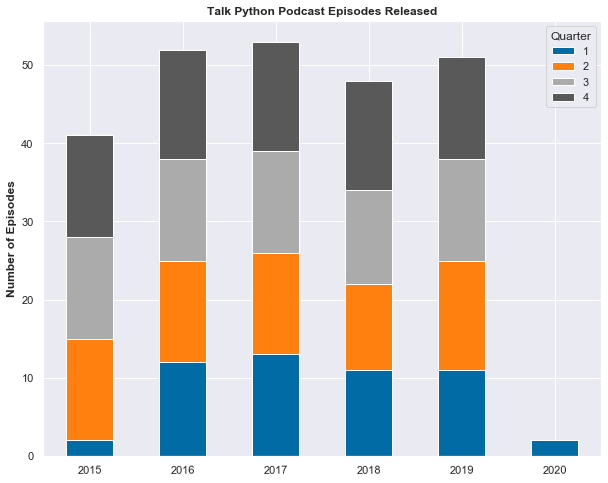

In [21]:
# The full release history !
style.use('tableau-colorblind10')
episodes.groupby(['Year', 'Quarter'])['Title'].count().unstack().plot(kind='bar', stacked=True, 
                                                                      figsize=(10, 8), rot=1)
plt.ylabel('Number of Episodes', weight='semibold')
plt.xlabel(None)
plt.title('Talk Python Podcast Episodes Released', weight='bold');

<h3 align='center'> In Conclusion </h3>

* If the website/service has an API, then you shouldn't even be scrapping data<br></br><br></br>
* With `requests` and `BeautifulSoup`, web scraping isn't daunting<br></br><br></br>
* Most difficult part will be traversing the html structure to find what you want; inspecting the html in your browser can be really helpful here <br></br><br></br>
* If data is in a nicely formatted html table, then `Pandas` `read_html()` can make it even easier to scrape<br>
</br><br></br>